In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def classificar(valores, marcacoes):
    """Agrupa o processo de separar os dados entre treino e teste e utilizar o classificador
    Forest Classifier
    
    Args:
        valores (array): Valores de X das características
        marcacoes (array): Valores de Y da função alvo
    
    """
    np.random.seed(333)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, marcacoes, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)
    print(f'Acurácia do RandomForestClassifier: {round(classificador.score(teste_x, teste_y)*100, 2)}%.')
    pass

def plot_violino_aux(valores, inicio, fim):
    """Agrupa o processo de separar os dados entre treino e teste e utilizar o classificador
    Forest Classifier
    
    Args:
        valores (array): Valores de X das características
        início (int): valor inicial para o slice do gráfico dos exames
        fim (int): valor final para o slice do gráfico dos exames
    
    """

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")
    dados_plot.diagnostico = dados_plot.diagnostico.map({0 : 'Benigno', 1 : 'Maligno'})
    
    plt.figure(figsize=(8,8))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split = True)

    plt.xticks(rotation = 90)
    pass



# 01. Dados com muitas dimensões

In [3]:
URI = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
dados = pd.read_csv(URI)

dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
# Contar número de entradas nulas por coluna e mostrar quais possuem ao menos uma
contador_de_nulos = dados.isnull().sum()
display(contador_de_nulos.loc[contador_de_nulos >0])

nulos_aux = contador_de_nulos.loc[contador_de_nulos >0].to_dict()
print(f'Porcentagem de nulos na coluna {list(nulos_aux.keys())[0]}: {round(list(nulos_aux.values())[0]/dados.shape[0]*100, 2)}%.')

exame_33    419
dtype: int64

Porcentagem de nulos na coluna exame_33: 73.64%.


In [5]:
valores_exames = dados.drop(columns=['id', 'diagnostico'])
diagnostico = dados.diagnostico.map({'M': 1, 'B': 0})  # Maligno --> 1, Benigno --> 0

# Removendo o exame_33, majoritariamente composto de entradas nulas
valores_exames = valores_exames.drop(columns=['exame_33'])

classificar(valores_exames, diagnostico)

Acurácia do RandomForestClassifier: 94.74%.


In [6]:
# Classificador de baseline
np.random.seed(333)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)
classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)
print(f'Acurácia do classificador bobo: {round(classificador_bobo.score(teste_x, teste_y)*100, 2)}%.')

Acurácia do classificador bobo: 65.5%.


# 02. Avançando e explorando dados

In [7]:
padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_std = padronizador.transform(valores_exames)
valores_std = pd.DataFrame(valores_std, columns=list(valores_exames.columns))

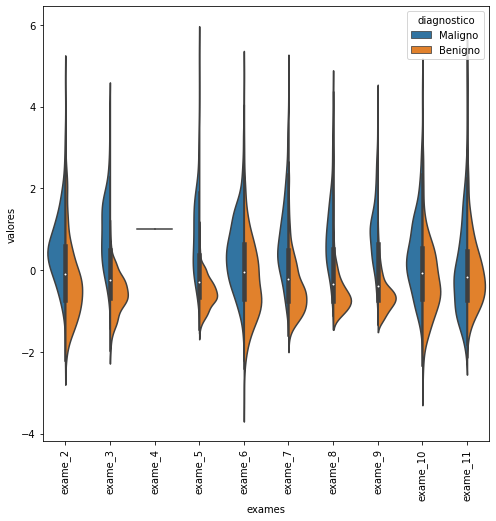

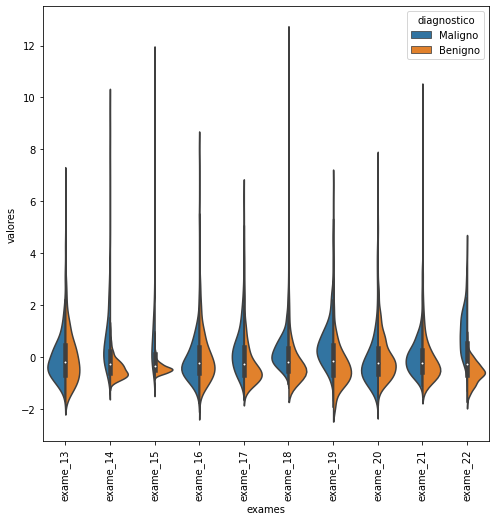

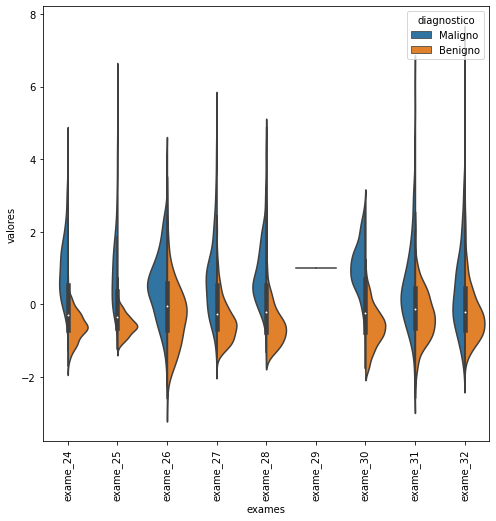

In [8]:
plot_violino_aux(valores_std, 1, 11)
plot_violino_aux(valores_std, 12, 22)
plot_violino_aux(valores_std, 23, 32)

Os exames 4 e 29 são constantes e, portanto, não agregam à separação feita pelo modelo. Além disso, quanto mais distantes (comparando benigno e maligno) e mais intensos forem os picos, mais relevante é a característica; como, por exemplo, no exame 30.

In [9]:
valores_exames = valores_exames.drop(columns=['exame_4', 'exame_29'])
classificar(valores_exames, diagnostico)

Acurácia do RandomForestClassifier: 94.74%.


# 03. Dados Correlacionados

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


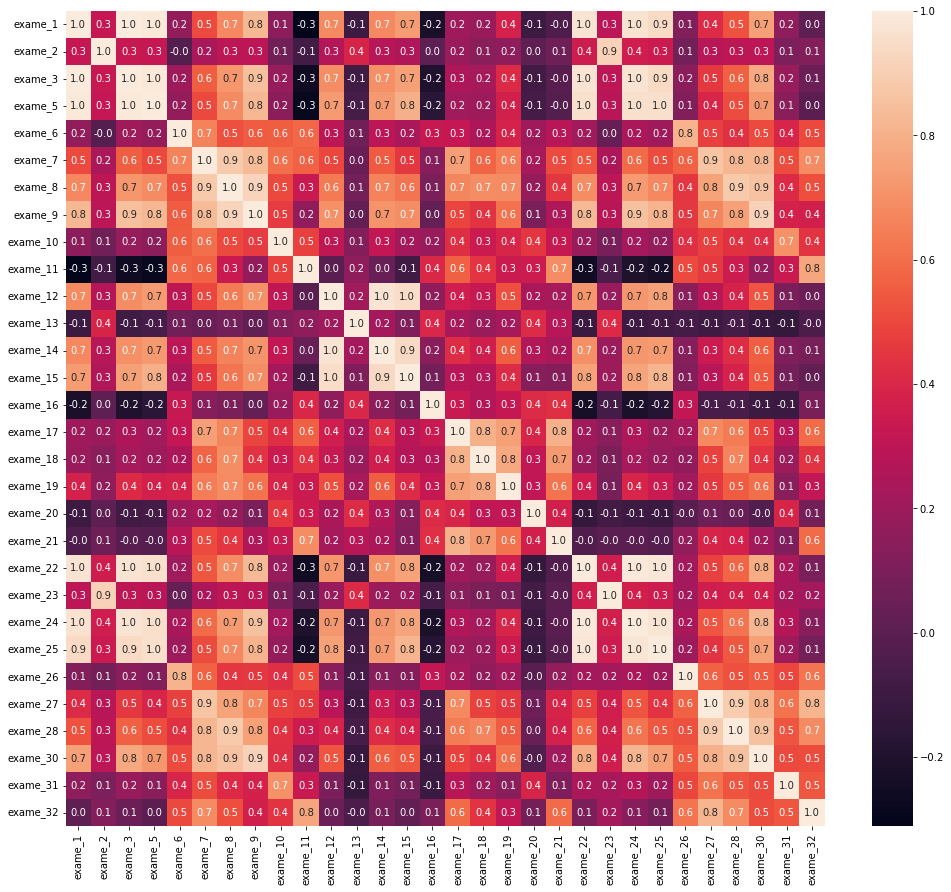

In [10]:
matriz_correlacao = valores_exames.corr()

plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")

matriz_correlacao.head()

In [11]:
# Matriz que registra apenas marcações de correlação alta (assumida como maior que 0.99)
correlacao_alta = matriz_correlacao[matriz_correlacao > 0.99]
# Para input na função pd.melt
correlacao_alta = correlacao_alta.reset_index().rename(columns={'index': 'id_exames'})
correlacao_alta.head()

,id_exames,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Fitragem dos pares de variáveis com correlação alta (ainda duplicados)
correlacao_alta_melted = pd.melt(frame=correlacao_alta,
    id_vars=['id_exames'], value_vars=list(correlacao_alta.columns))
corr_spec = correlacao_alta_melted.loc[~np.isnan(correlacao_alta_melted.value), :]
corr_spec = corr_spec.loc[corr_spec.id_exames != corr_spec.variable, :]
corr_spec

,id_exames,variable,value
2,exame_3,exame_1,0.997855
60,exame_1,exame_3,0.997855
622,exame_24,exame_22,0.993708
680,exame_22,exame_24,0.993708


In [13]:
# Organizando para exibir somente 1 vez cada par
aux = corr_spec.drop(columns=['value'])
corr_spec_n = pd.DataFrame(data=[aux.apply(max, axis=1), aux.apply(min, axis=1), corr_spec.value],
                          index=['feat_1', 'feat_2', 'values']).transpose().drop_duplicates()
corr_spec_n

,feat_1,feat_2,values
2,exame_3,exame_1,0.997855
622,exame_24,exame_22,0.993708


A grosso modo, duas variáveis com alta correlação têm contribuição equivalente no modelo, uma vez que a variação de uma leva a uma variação direta na outra. Sendo assim, a cada par de variáveis correlacionadas, é possível retirar uma sem prejuizo.
No caso, retira-se um de cada par (1 ou 3; 22 ou 24).

In [14]:
# Escolhendo para retirar os exames que não agregam ao modelo
valores_exames = valores_exames.drop(columns=['exame_24', 'exame_3'])
# Checar a manutenção da acurácia
classificar(valores_exames, diagnostico)

Acurácia do RandomForestClassifier: 95.91%.


# 04. Automatizando a seleção

In [15]:
# (1) Pela função kbest
selecionar_kmelhores = SelectKBest(chi2, k=10)

# Para usar a função chi2, deve-se ter somente valores > 0. Tratando o dataset antes do padronizador:
# (dados iniciais retirando as colunas avaliadas até então)
valores_exames = dados.drop(columns=['exame_3', 'exame_4', 'exame_24', 'exame_29', 'exame_33',
                                    'id', 'diagnostico'])
diagnostico = dados.diagnostico.map({'M': 1, 'B': 0})  # Maligno --> 1, Benigno --> 0

In [16]:
np.random.seed(333)

# Segregando o dataset e calculando as melhores features:
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)
selecionar_kmelhores.fit(treino_x, treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

# No classificador:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_kbest, treino_y)
print(f'Acurácia do RandomForestClassifier: {round(classificador.score(teste_kbest, teste_y)*100, 2)}%.')

Acurácia do RandomForestClassifier: 95.32%.


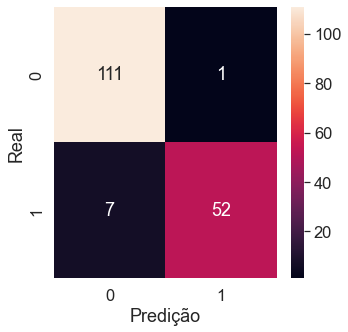

In [17]:
# Matriz de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

plt.figure(figsize = (5, 5))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")
plt.show()
# [    Negativo      falso negativo
#   falso positivo      positivo   ]

In [18]:
np.random.seed(333)
# (2) Pela função RFE:

# Separação dos dados
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

# Classificador --> Selecionador de features
classificador = RandomForestClassifier(n_estimators=100)
selecionar_rfe = RFE(estimator=classificador, n_features_to_select=10, step=1)
selecionar_rfe.fit(treino_x, treino_y)

# Gerando dados de treino e teste para usar o classificador
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)
print(f'Acurácia do RandomForestClassifier: {round(classificador.score(teste_rfe, teste_y)*100, 2)}%.')

Acurácia do RandomForestClassifier: 94.15%.


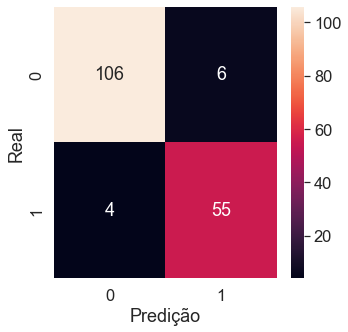

In [19]:
# Matriz de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize = (5, 5))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")
plt.show()

A seleção de features pelo método KBest apresentou uma acurácia melhor. Apesar disso, este não deve ser o único parâmetro. No caso, a avaliação se dá num dataset para diagnóstico de câncer por meio de diversos exames, supõe-se que de uma maneira precoce. Para casos como esse, pode ser de interesse a busca pelo menor número possível dos 'falsos negativos', ou seja, pessoas com câncer e que passariam por saudáveis perdendo a chance de um tratamento prematuro, enquanto os falsos positivos sofreriam, no máximo um acompanhamento até que sua condição fosse revelada. Se a escolha priorizasse esse indicador, usaríamos o RFE.

# 05. Visualizando os dados no plano

In [20]:
# Uma outra forma de feature selection, RFECV:
np.random.seed(333)

# Separação dos dados
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

# Classificador --> Selecionador de features
classificador = RandomForestClassifier(n_estimators=100)
selecionar_rfecv = RFECV(estimator=classificador, cv=10, scoring='accuracy', step=1)
selecionar_rfecv.fit(treino_x, treino_y)

# Gerando dados de treino e teste para usar o classificador
treino_rfecv = selecionar_rfecv.transform(treino_x)
teste_rfecv = selecionar_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)
print(f'Acurácia do RandomForestClassifier: {round(classificador.score(teste_rfecv, teste_y)*100, 2)}%.')

Acurácia do RandomForestClassifier: 95.91%.


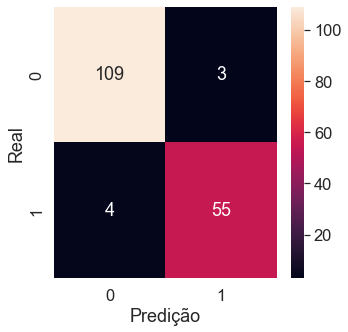

In [21]:
# Matriz de confusão
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

plt.figure(figsize = (5, 5))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")
plt.show()

### RFE

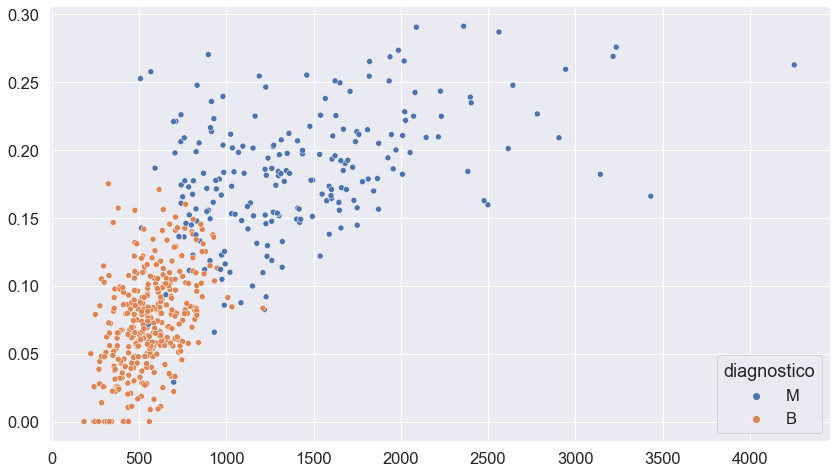

In [22]:
# Redução de Dimensionalidade
np.random.seed(333)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

# Por RFE (n_features=2 para visualização no plano)
classificador = RandomForestClassifier(n_estimators=100)

selecionar_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionar_rfe.fit(treino_x, treino_y)
treino_rfe = selecionar_rfe.transform(valores_exames)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=treino_rfe[:,0], y=treino_rfe[:,1], hue=diagnostico.map({0: 'B', 1: 'M'}))
plt.show()

### PCA

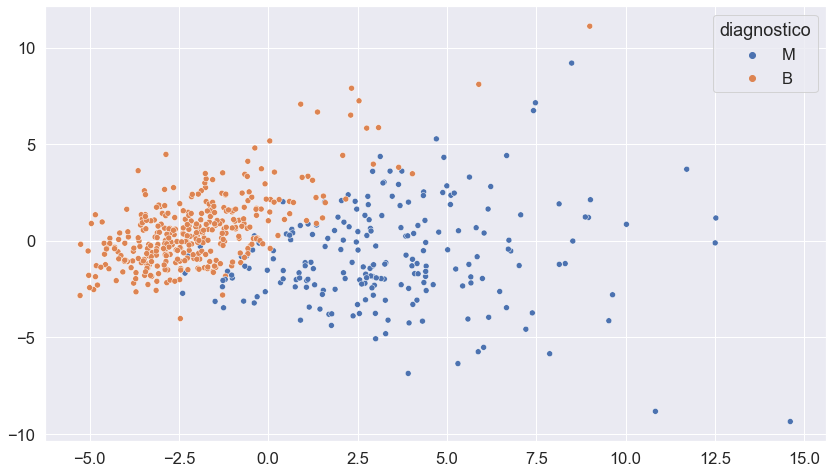

In [23]:
np.random.seed(333)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

pca = PCA(n_components=2)

# Padronizar melhora os resultados do PCA
padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_std = padronizador.transform(valores_exames)
valores_std = pd.DataFrame(valores_std, columns=list(valores_exames.columns))

pca_valores = pca.fit_transform(valores_std)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=pca_valores[:, 0], y=pca_valores[:, 1], hue=diagnostico.map({0: 'B', 1: 'M'}))
plt.show()

### TSNE

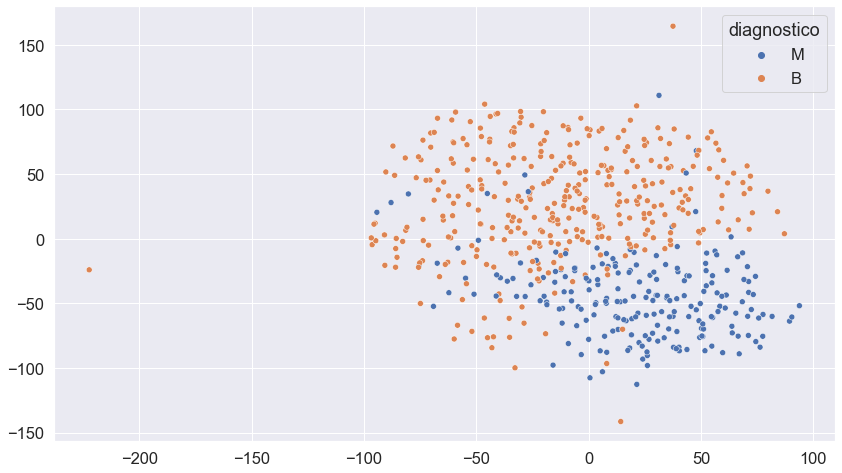

In [24]:
np.random.seed(333)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

tsne = TSNE(n_components=3)

# Usando o valor padronizado, também
padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_std = padronizador.transform(valores_exames)
valores_std = pd.DataFrame(valores_std, columns=list(valores_exames.columns))

valores_tsne = tsne.fit_transform(valores_std)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=valores_tsne[:, 0], y=valores_tsne[:, 1], hue=diagnostico.map({0: 'B', 1: 'M'}))
plt.show()